In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
%matplotlib widget
plt.style.use('dark_background')

In [67]:
A = SlabExact(ns=[3.], Ts=[6], xrefs=[1000], symmetric=True)

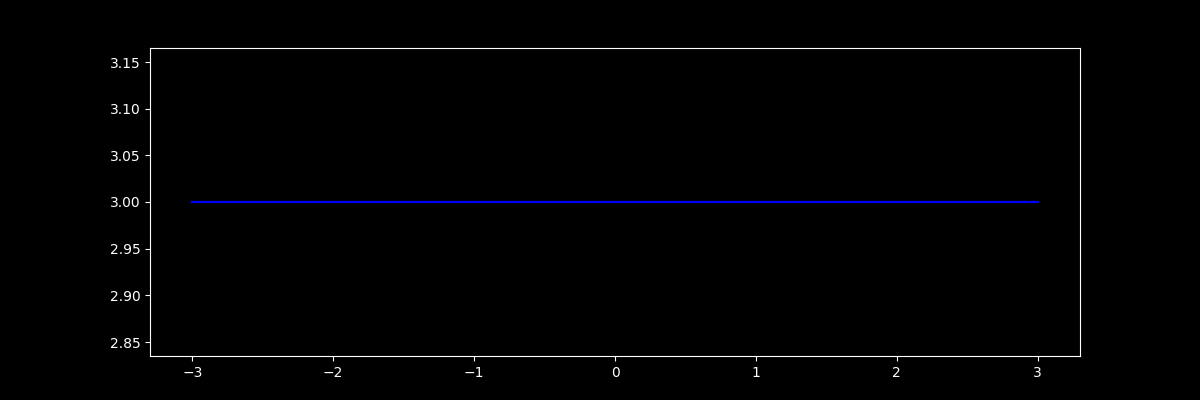

In [68]:
A.plot_refractive_index()

In [69]:
def dirac(x, tol=.007):
    return 2/tol * np.where(np.abs(x)<= tol,1,0)
    
def dirac_exact(beta, field_type='TE', sign='+1', phase=None):
    M = A.coefficients(beta, up_to_region=1, field_type=field_type, mode_type='radiation',
                      sign=sign, phase=phase)
    return beta/(2*A.K0)*np.sum(M[..., 1], axis=len(M[..., 1].shape)-1)

def f(x):
    return 1-x**2

def g(x):
    return np.exp(-x**2)

def quadratic_piecewise(x):
    conds = [(x<-1), ((-1<=x)*(x<=1)), (x>1)]
    funcs = [0, lambda x: 1-x**2, 0]
    return np.piecewise(x, conds, funcs)

def quadratic_piecewise2d(x, zs=None, wavenumber=A.K0):
    conds = [(x<-1), ((-1<=x)*(x<=1)), (x>1)]
    funcs = [0, lambda x: 1-x**2, 0]
    fx = np.piecewise(x, conds, funcs)
    fz = np.exp(1j * wavenumber * zs)
    return np.outer(fz, fx)

f0 = quadratic_piecewise

In [70]:
xs = np.linspace(-5,5,2000)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

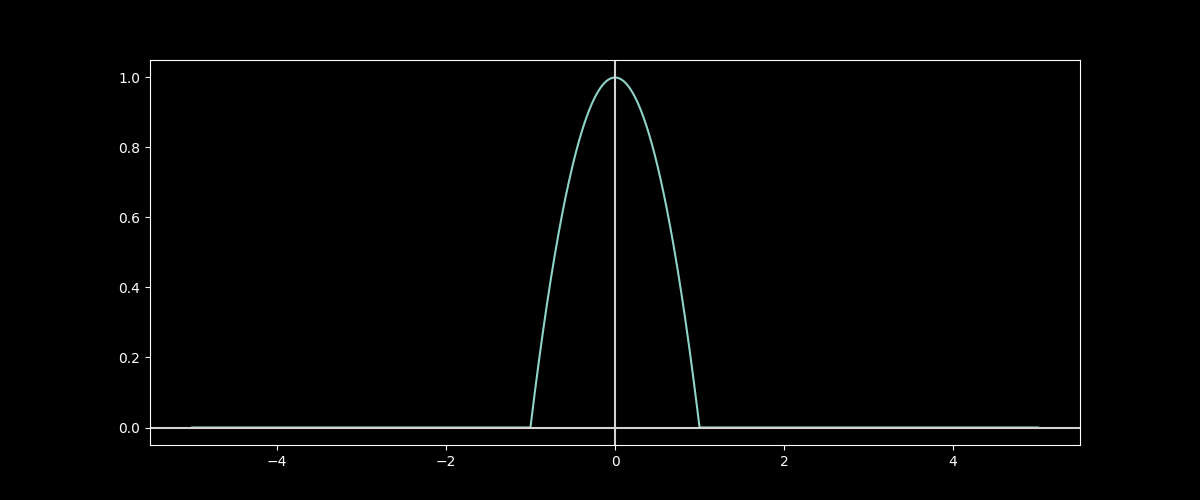

In [71]:
A.plot_field_1d(f0, xs=xs)

In [72]:
# A.plot_field_2d(quadratic_piecewise2d, xs=xs, zmin=-10, zmax=0, zref=100)

In [73]:
Propagator = A.propagator()

## Propagation for 1-x^2

In [131]:
P_prop = Propagator(A.real_contour(0, A.Z_evanescent, 100), f0=quadratic_piecewise, Lx=-1, Rx=1)
P_ev = Propagator(A.real_contour(A.Z_evanescent, 50, 200), f0=quadratic_piecewise, Lx=-1, Rx=1)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

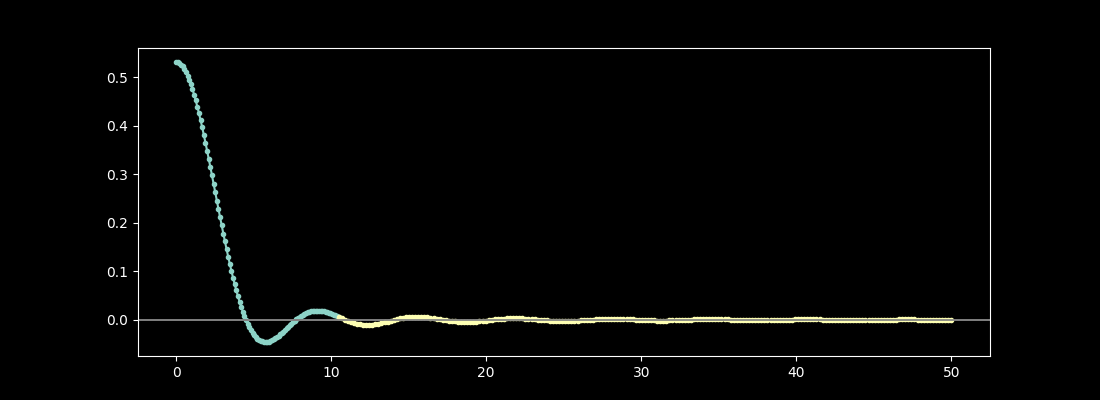

In [132]:
P_prop.plot_transform()
P_ev.plot_transform(ax=plt.gca())

In [133]:
prop = lambda x: P_prop.slice_propagate(x)
ev = lambda x: P_ev.slice_propagate(x)
full = lambda x: prop(x) + ev(x)

Prop = lambda x, z: P_prop.propagate(x, z)
Ev = lambda x, z: P_ev.propagate(x, z)
Full = lambda x, z : Prop(x,z) + Ev(x,z)

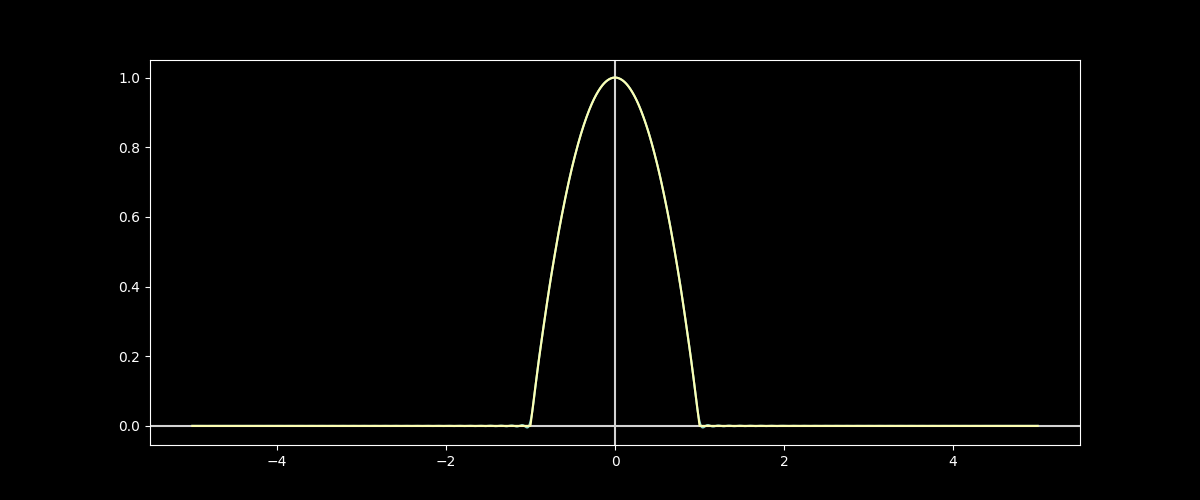

In [134]:
plt.close('all')
A.plot_field_1d(full, xs=xs)
A.add_1d_plot(f0, xs=xs)
# A.add_1d_plot(ev, xs=xs)

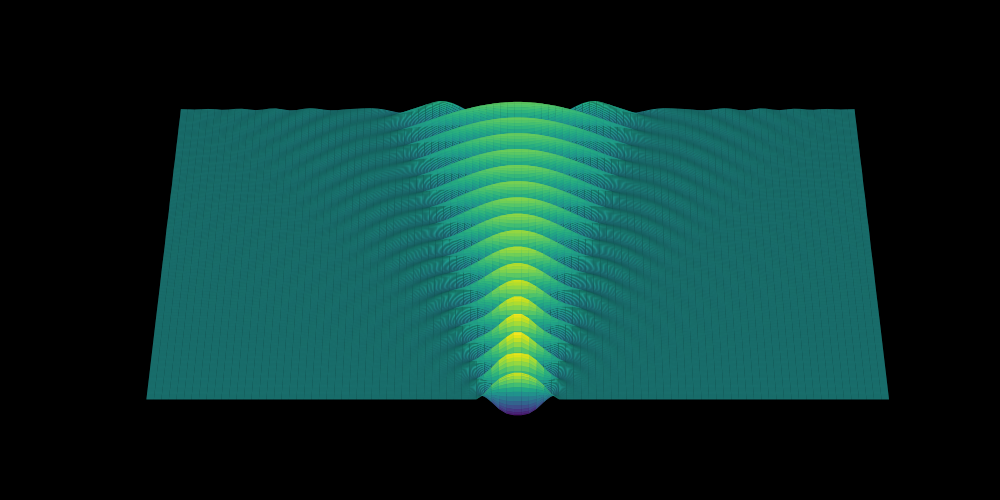

In [135]:
A.plot_field_2d_surface(Full, xs=np.linspace(-10,10, 100), zmax=10, zref=500, cstride=1, rstride=1);